In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/nlp_liflow/

/content/drive/My Drive/nlp_liflow


In [ ]:
!ls

자연어처리_1.ipynb		  item_all.csv
자연어처리_2.ipynb		  ko.bin
all_df_with_tokens.csv		  list_to_csv.csv
all_sen.csv			  nlp_tokenizer.ipynb
cc.ko.300.bin.gz		  스포츠_sen.csv
df_all				  sen.csv
df_all.csv			  sen_preprocessig.csv
df_all_GloVe.csv		  스포츠_sen_prerprocessing.csv
df_all_tfidf.csv		  sentence_Summarizer.ipynb
doc2vec_100.model		  textrank
feature.pkl			  textrank_git
feature.pkl.mtx			  tfidftransformer.pkl
first_embedding_clustering.model  자연어처리_tomotopy_HDPModel.ipynb
glove_model_100.model		  자연어처리_tomotopy.ipynb
glove_model.model		  자연어처리_tomotopy_modeling.ipynb
glove_word_dict_128.pickle	  vectorizer.pkl
item_1.csv			  word2vec_model


In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

--2022-11-26 12:22:14--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6021:18::a27d:4112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-11-26 12:22:14--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uccac3da284fec3385f3449d541b.dl.dropboxusercontent.com/cd/0/get/BxcCrJRvqQdcyMn4IT2OpEPNkNHvJB9MskIh6FM8ZiuU6qqRL2WNhUu2UiP857NIFceIyhyJVIXKScLkmC5ZcuOmmFgwiUnzJ4kLPr2aneZ-eS7h_Djh4sIJ1hZ500D9lfsJ3UfzPRQDClcA1B6zJphWrXMkloY8bcUuJ7AF-_HXMfJGlJceS5h8Nnw4qA-DWPU/file?dl=1# [following]
--2022-11-26 12:22:15--  https://uccac3da284fec3385f3449d541b.dl.dropboxusercontent.com/cd/0/get/BxcCrJRvqQd

In [ ]:
!pip install kss

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42.4 MB 1.2 MB/s 
     |████████████████████████████████| 131 kB 34.8 MB/s 
  Created wheel for kss: filename=kss-3.6.4-py3-none-any.whl size=42448614 sha256=5ccf119ce636438663be5e4ddb13a2e37bf5b040e933b240b4db6a561d0135ac
  Stored in directory: /root/.cache/pip/wheels/32/53/7c/76bdf098c2a6c5cd4c4c29648da30ad4793d604314b2aeb26f
Successfully built kss


In [ ]:
import textrank_git
from textrank_git import rank
from textrank_git import sentence
from textrank_git import summarizer
from textrank_git import utils
from textrank_git import word
import re
import kss
import pandas as pd
from konlpy.tag import Mecab
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from gensim import models
import gensim
import logging
import os
from collections import namedtuple, defaultdict
from collections.abc import Iterable
from timeit import default_timer
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sklearn.model_selection import train_test_split
from dataclasses import dataclass
from numpy import zeros, float32 as REAL, vstack, integer, dtype
import numpy as np
from gensim import utils, matutils  # utility fnc for pickling, common scipy operations etc
from gensim.utils import deprecated
from gensim.models import Word2Vec # noqa: F401
from gensim.models.keyedvectors import KeyedVectors
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

In [ ]:
main_df = pd.read_csv('all_df_with_tokens.csv',index_col = 0)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
main_df['convrsThema'] = main_df['convrsThema'].str.replace('코로나/생활', '투병')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('메르스', '투병')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('축구선수', '축구')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 문학 ', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('독서', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('문학', '책')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('집값', '부동산')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('분양', '부동산')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직업', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('좋은글,사자성어,좋은글귀,등등 읽으면 도움이되는 글들..', '좋은글')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('국제관계', '정치')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('제테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시사/재테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 경제/재테크 ', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 경제/재태크 ', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 자연/휴양지 ', '자연/여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자동차보험', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교통사고', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('운전', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 자동차 ', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀취업', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀직장', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀입대', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀교육', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀결혼', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 취업', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 교육', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자녀 결혼', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상생활', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상 이야기', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('일상대화', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#일상', '일상')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('이사', '이사/이민')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('이민', '이사/이민')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('먹거리', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('먹거리/건강', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 먹거리 ', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('육아', '육아')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('양육/교육', '육아')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교육', '교육')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('운동', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 스포츠/레저 ', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화관', '영화관')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 영화 ', '영화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('연예인', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 방송/연예 ', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 연애/결혼 ', '연애')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행계획', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여가생활', '여가')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시댁살이', '시집살이')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('시댁', '시집살이')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('말씀나누기', '대화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 만화 ', '만화')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('결혼생활', '결혼')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('남편', '결혼')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강/다이어트', '다이어트')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 건강/다이어트 ', '다이어트')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('노후준비', '노후')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('노후대책', '노후')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('넷플릭스', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('TV', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('드라마', '방송')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 군대 ', '군대')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강/교육', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('가족건강', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('가정', '가족')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#인생', '인생')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('반려동물,강아지', '반려동물')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 국가/지역 ', '국가/지역')
main_df['convrsThema'] = main_df['convrsThema'].str.replace(' 게임 ', '게임')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식', '건강식품')

main_df['convrsThema'] = main_df['convrsThema'].str.replace('수영', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('볼링', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('축구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('야구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('배구', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('골프', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직장상', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('#직장상', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('직장화', '직장')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('피시방', '게임')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('요리', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('밥', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식품품', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강식품', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('식습관', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('음식점', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('음식/건강', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영양제', '음식')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('제주도', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('휴양지', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('등산', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('캠핑', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여가', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('게읻트볼', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자전거', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스쿠버다이빙', '취미생활')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('해외여행', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('건강검진', '건강')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('연애/결혼', '연애')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('육아', '자녀')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스포츠/레저', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('재태크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('부동산', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('경제', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('아파트', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('재개발', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('돈', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('경제/재테크', '재테크')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('방송', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('영화관', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('방송/연예/연예', '방송/연예')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('책', '교육')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('교통사고/보험/보험', '교통사고/보험')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('자동차면허', '자동차')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('벌초', '제사')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('장례', '제사')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('학창시절', '친구')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('스포츠/레저', '스포츠')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행/건강', '여행')
main_df['convrsThema'] = main_df['convrsThema'].str.replace('여행/자녀', '자녀')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()


In [ ]:
import operator
files = main_df.loc[operator.or_(main_df['colctUnitCode']=="음성수집 도구" , main_df['colctUnitCode']=="스튜디오"), ]

In [ ]:
files = files.loc[files['convrsThema']=="스포츠", "sentence"]

In [ ]:
mecab = Mecab()

def tokenizer(raw, pos=["NNG","NNP","VV","VA"]): 
  return [word for word, tag in mecab.pos(raw) if len(word) > 1 and tag in pos]

def duplicate_drop(df):
  df_a = df.apply(lambda a : tokenizer(a))
  df_a= df_a.drop_duplicates(keep='first')
  idx = df_a.index
  return df.loc[idx]

def preprocessing(sents):
  remain_pattern = re.compile(r'\([^)]*\)')
  hangul = re.compile('[^ ㄱ-ㅣ가-힣]+')

  ws_replace = re.sub(r'\xa0', r'', sents)
  text_rm = remain_pattern.sub(r'', ws_replace)
  text = hangul.sub(r'', text_rm)
      
  return text

def whitespace_drop(sents):
  sents = sents.replace(" ","")

  return sents

In [ ]:
files = files.apply(lambda a : preprocessing(a))
files_wsd = files.apply(lambda a : whitespace_drop(a))
files_wsd = files_wsd.drop_duplicates(keep='first')
idx = files_wsd.index
files = files.loc[idx]
files = duplicate_drop(files)
files

122785     어제 탁구 시합할 때 그 빽 서브 넣을 때 그렇게 연습을 안 하고 하니까
122786                          그게 잘 들어가던데 빽 서브 넣는데
122787                          그것도 연습을 좀 많이 해야겠더라고
122788                       조금 하다 보니까 공이 막 뜨고 그러니까
122789              상대방이 때리고 나니까 쫌 그것도 안 좋기는 안 좋더라고
                            ...                    
316457    나도 배드민턴 해봤지만  배드민턴 채 하나에  기본적으로 최소 이십만원이야
316458       탄성이 다르거든 하다 보면 운동이라는 것이  욕심이라는 것이 생기잖아
316459         아무튼 스포츠가 됐든 레저가 됐든 뭐든지 너무 과하게  하다 보면
316596    왜 한국에 와서 그렇게  했느냐고 물었을 때 그냥 고개를 돌렸다고 하더라고
316627        이름이 잘 알려진 메시보다 잘하니까 흔히  신계라고 말하기는 하지만
Name: sentence, Length: 4821, dtype: object

# Doc2Vec

In [ ]:
token = []
convrs = []
for i in files:
  convrs.append(i)
  token.append(tokenizer(i))

In [ ]:
common_texts_and_tags = [
    (text, [f"convrs_{i}",]) for i, text in enumerate(token)
]
'''
for text, tags in common_texts_and_tags:
    print(f"tags: {tags}, text: {text}")
'''
TRAIN_documents = [TaggedDocument(words=text, tags=tags) for text, tags in common_texts_and_tags]
docvecmodel = Doc2Vec(TRAIN_documents, vector_size=100, alpha = 0.025, epochs = 100, window=5, min_count=1, workers=4)

#모델 저장하기     
docvecmodel.save('doc2vec_100.model')

doc_vec_100 = pd.DataFrame(columns=['tag','text','trained_vector','convrs'])

# document의 vector를 구하는 방법은, 기 학습된 docvec을 가져오거나, 해당 단어를 넣고 다시 예측하는 것. 
for (text, tags),convrs in zip(common_texts_and_tags, convrs):
    trained_doc_vec = docvecmodel.docvecs[tags[0]]
    test_doc_vec = docvecmodel.infer_vector(text) #같은 문서를 모델에 다시 넣어서 옳게 임베딩을 진행했는지 확인해보기
    new_row = pd.DataFrame([[tags, text, trained_doc_vec, convrs]], columns = doc_vec_100.columns)
    doc_vec_100 = pd.concat([doc_vec_100, new_row], ignore_index = True)
    print(f"tags: {tags}, text: {text}")
    print(f"trained_doc_vec: {trained_doc_vec}")
    print(f"inferred_doc_vec: {test_doc_vec}")
    print("--"*20)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  0.16367437  0.06271682  0.39962998  0.20051028 -0.41576007  0.12374432
  0.4126947   0.12789103  0.11648284  0.21853341 -0.01878183  0.2097052
  0.09471952  0.07892596  0.04785311 -0.15407619 -0.13765763 -0.05813141
 -0.22567356 -0.1111184   0.10116708 -0.07397772 -0.05058411  0.37204707
  0.02121126  0.06684037  0.1317892   0.1778365   0.11337249 -0.03248761
 -0.00419222 -0.09050354 -0.06021412  0.08518086 -0.3142623  -0.08785712
  0.14489523  0.18120158  0.12111755  0.11378664]
----------------------------------------
tags: ['convrs_4691'], text: ['거리', '퍼팅']
trained_doc_vec: [ 0.02626228  0.18894161 -0.0930694   0.04150572 -0.09016243  0.00436033
  0.01195172 -0.16379829 -0.03616248 -0.04888334 -0.17469488  0.03210248
 -0.15930277 -0.1569546  -0.09409203 -0.0266309   0.12221354 -0.19297007
 -0.06732501  0.01294665 -0.10072652  0.02515901 -0.02112873 -0.05829905
 -0.16812679 -0.02053985  0.09868138 -0.10797595  0.21144725 -0.08264215
  0.10189872

In [ ]:
feature=[]
for i in range(0,40):
    a = "feature"+str(i)
    feature.append(a)
# 1500 개의 주성분으로 차원 축소
pca = PCA(n_components= 40) 
printcipalComponents = pca.fit_transform(docvecmodel.docvecs.vectors_docs)

principalDf = pd.DataFrame(data=printcipalComponents, columns = feature)
print(sum(pca.explained_variance_ratio_))

0.9779029188212007


In [ ]:
principalDf

,feature0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature30,feature31,feature32,feature33,feature34,feature35,feature36,feature37,feature38,feature39
0,-0.560182,0.275281,0.057117,0.173761,0.505635,0.557354,-0.265717,0.017820,-0.312579,0.190931,...,0.053992,-0.133479,0.065980,0.004827,0.023285,-0.114813,-0.085968,-0.067075,-0.000023,-0.024256
1,-0.008907,0.082369,-0.192739,0.176002,0.221654,0.215347,0.060869,0.097988,-0.103765,0.062318,...,-0.063947,0.044714,0.080094,0.026819,0.037283,-0.019199,-0.096433,0.009625,0.005547,-0.015135
2,-0.064639,-0.331590,-0.251728,0.339187,0.022708,0.474621,-0.420891,-0.107883,-0.258933,0.117963,...,0.024082,-0.091257,0.003173,0.011687,0.003887,-0.005098,-0.046170,-0.049596,-0.020918,0.015712
3,0.020977,0.046252,0.073078,0.113567,0.029853,-0.105308,0.041439,-0.024653,0.018941,0.043385,...,-0.021429,-0.034559,-0.008542,0.074271,-0.005040,-0.021894,-0.010227,0.032900,0.009575,-0.008191
4,-0.240984,0.120501,-0.009502,0.016081,0.430937,0.136341,-0.021624,0.119189,0.041776,0.196644,...,0.040547,0.051110,0.021244,0.002349,0.011865,0.022380,-0.026656,-0.005888,-0.006264,-0.010998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4816,-0.335439,-0.046008,0.175675,-0.007936,-0.095293,0.081377,0.227729,0.198276,0.080808,0.281188,...,0.168906,0.098264,0.005198,0.073786,-0.048784,-0.031330,-0.091655,-0.096162,-0.007420,0.062061
4817,-0.387892,-0.008892,-0.369550,-0.044574,0.223017,-0.418921,-0.078242,0.376958,0.156577,0.019818,...,-0.012326,0.036868,-0.016879,-0.103415,-0.059188,0.050199,-0.055034,0.013462,-0.006318,-0.006815
4818,-0.134584,0.101630,-0.107812,-0.342996,-0.106651,-0.335882,0.027956,0.275023,0.092881,0.074670,...,0.033573,-0.035834,-0.007059,-0.000074,0.016365,0.064752,0.020666,-0.011766,-0.043934,0.017063
4819,0.443552,-0.045325,0.050754,-0.585072,-0.288351,0.176425,0.362819,-0.038003,0.296236,-0.099496,...,-0.048040,-0.045732,-0.105454,0.024340,-0.056212,-0.001747,-0.026347,0.043519,-0.073699,-0.060166


In [ ]:
doc_vec_100

,tag,text,trained_vector,convrs
0,[convrs_0],"[탁구, 시합, 서브, 연습]","[-0.13926843, 0.20846312, -0.10586611, 0.06018...",어제 탁구 시합할 때 그 빽 서브 넣을 때 그렇게 연습을 안 하고 하니까
1,[convrs_1],"[들어가, 서브]","[-0.05479081, 0.16172524, -0.10166297, -0.0308...",그게 잘 들어가던데 빽 서브 넣는데
2,[convrs_2],[연습],"[-0.08176969, 0.26653916, -0.06905648, 0.15194...",그것도 연습을 좀 많이 해야겠더라고
3,[convrs_3],[그러],"[-0.0066431537, 0.100176275, -0.064752564, 0.0...",조금 하다 보니까 공이 막 뜨고 그러니까
4,[convrs_4],"[상대방, 때리]","[-0.05804265, 0.107864365, -0.1340502, -0.0168...",상대방이 때리고 나니까 쫌 그것도 안 좋기는 안 좋더라고
...,...,...,...,...
4816,[convrs_4816],"[배드민턴, 배드민턴, 기본, 최소]","[-0.08963471, 0.16183847, -0.15370066, 0.02755...",나도 배드민턴 해봤지만 배드민턴 채 하나에 기본적으로 최소 이십만원이야
4817,[convrs_4817],"[탄성, 다르, 운동, 욕심, 생기]","[-0.026381005, 0.1514356, -0.19870077, -0.0323...",탄성이 다르거든 하다 보면 운동이라는 것이 욕심이라는 것이 생기잖아
4818,[convrs_4818],"[스포츠, 레저, 과하]","[-0.018446704, 0.080387965, -0.10664154, -0.01...",아무튼 스포츠가 됐든 레저가 됐든 뭐든지 너무 과하게 하다 보면
4819,[convrs_4819],"[한국, 그렇, 고개]","[-0.19074613, 0.041344166, -0.070144325, 0.002...",왜 한국에 와서 그렇게 했느냐고 물었을 때 그냥 고개를 돌렸다고 하더라고


In [ ]:
# 2차원으로 축소
n_components = 2

# t-SNE 모델 생성
tsne = TSNE(n_components = n_components)

# 학습한 결과 2차원 공간값 출력
tsnedata = tsne.fit_transform(principalDf)

print(tsnedata)
column = ['x', 'y']
tsnedata = pd.DataFrame(tsnedata, columns = column)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[[ 36.186317   42.90022  ]
 [-27.246628   49.353436 ]
 [ 40.378773   38.787724 ]
 ...
 [ -7.8925357   5.527579 ]
 [-34.427055  -56.635624 ]
 [-47.213142  -16.4819   ]]


# DBSCAN

In [ ]:
df = pd.DataFrame(columns = [str(i) for i in range(100)])
for i in doc_vec_100['trained_vector']:
  df = df.append(pd.Series(i, index=df.columns), ignore_index=True)  #100차원 값

In [ ]:
df = tsnedata #pca -> 2차원 축소 값

In [ ]:
df = principalDf #pca n차원 축소 값

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot  as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns

scaler = StandardScaler()
dbscan = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)
# create model and prediction
dbscanmodel = DBSCAN(eps=3, min_samples= 10)#적어도 10개의 샘플이 모여야 한 군집으로
dbscanmodel.fit(dbscan)
doc_vec_100['cluster'] = dbscanmodel.fit_predict(dbscan)
result = dbscanmodel.fit_predict(dbscan)
doc_vec_100

,tag,text,trained_vector,convrs,cluster,tsne_x,tsne_y
0,[convrs_0],"[탁구, 시합, 서브, 연습]","[-0.13926843, 0.20846312, -0.10586611, 0.06018...",어제 탁구 시합할 때 그 빽 서브 넣을 때 그렇게 연습을 안 하고 하니까,-1,36.973473,50.255428
1,[convrs_1],"[들어가, 서브]","[-0.05479081, 0.16172524, -0.10166297, -0.0308...",그게 잘 들어가던데 빽 서브 넣는데,-1,41.831459,-17.597322
2,[convrs_2],[연습],"[-0.08176969, 0.26653916, -0.06905648, 0.15194...",그것도 연습을 좀 많이 해야겠더라고,0,40.442955,45.263596
3,[convrs_3],[그러],"[-0.0066431537, 0.100176275, -0.064752564, 0.0...",조금 하다 보니까 공이 막 뜨고 그러니까,0,-3.694980,11.992230
4,[convrs_4],"[상대방, 때리]","[-0.05804265, 0.107864365, -0.1340502, -0.0168...",상대방이 때리고 나니까 쫌 그것도 안 좋기는 안 좋더라고,-1,0.055956,15.862434
...,...,...,...,...,...,...,...
4816,[convrs_4816],"[배드민턴, 배드민턴, 기본, 최소]","[-0.08963471, 0.16183847, -0.15370066, 0.02755...",나도 배드민턴 해봤지만 배드민턴 채 하나에 기본적으로 최소 이십만원이야,-1,-22.554787,19.639952
4817,[convrs_4817],"[탄성, 다르, 운동, 욕심, 생기]","[-0.026381005, 0.1514356, -0.19870077, -0.0323...",탄성이 다르거든 하다 보면 운동이라는 것이 욕심이라는 것이 생기잖아,-1,24.284426,16.709215
4818,[convrs_4818],"[스포츠, 레저, 과하]","[-0.018446704, 0.080387965, -0.10664154, -0.01...",아무튼 스포츠가 됐든 레저가 됐든 뭐든지 너무 과하게 하다 보면,-1,11.952270,-9.131122
4819,[convrs_4819],"[한국, 그렇, 고개]","[-0.19074613, 0.041344166, -0.070144325, 0.002...",왜 한국에 와서 그렇게 했느냐고 물었을 때 그냥 고개를 돌렸다고 하더라고,-1,-55.778450,-30.607761


In [ ]:
count = 0
for cluster_num in set(result):
    # -1,0은 노이즈 판별이 났거나 클러스터링이 안된 경우
    if(cluster_num == -1 or cluster_num == 0): 
        continue
    else:
        print("cluster num : {}".format(cluster_num))
        temp_df = doc_vec_100[doc_vec_100['cluster'] == cluster_num] # cluster num 별로 조회
        for title in temp_df['convrs']:
            print(title) 
            count+=1
        print()

print(count)


cluster num : 1
왜냐하면 탁구를 이렇게 치면은 치매도 좋다고 하고 뭐든게 다 좋다고
그렇게 해서 그냥 탁구를 못 치는데 그냥 계속 칠라고
시골에 가서 일도 좀 하고 주중에는 탁구도 치고 하는 게 좋은 거 같애
그 볼은 받으려면 그런데 탁구는 그래도 그 반경이 좀 좁잖아
나는 운동을 안 해 봤지만 안 해 보고 탁구를 배웠거든
우리 탁구 치는 날까지 그래 우리는 우정을 변치말자
다 탁구가 좋아서 모이고 하는 거라 다 사람들이 다 순하고 좋은 거 같애
나는 이게 탁구를 못 쳐서 자신감이 없어
다들 바쁘겠지 그렇지만 그래도 탁구가 좋아서 오는 사람들이잖아
탁구는 이게 좁은 공간에서 그걸 넣는다는게 힘든 거 같아 내가 보니까
나도 이렇게 테레비나 이렇게 탁구 저기한 사람들 이렇게 봤어
다들 바쁘겠지 바쁘겠지만 그래도 탁구가 좋아서 오는 사람들이 잖아
나도 이렇게 텔레비나 이렇게 탁구 저기한 사람들 이렇게 봤어
집에서 심심하면 우리 탁구나 한번 칠까 나가서 탁구 한번 치면 몸두 개운하고
내가 계속 바쁘다고  창피할까 봐 안 가는 거야  
 하는 것보다는 구경하는 쪽을 많이 하고 탁구도 많이 쳤던 거 같아요
우리  탁구장이 있거든 가서 가족들이랑 탁구를 많이 치거든
직접적으로    탁구도 많이 쳤던 거 같아요
아까 탁구 얘기를 했는데  사실 탁구가 굉장히 전신에 좋은 운동이거든
나도 사십대 중반까지는 탁구를 치다가 안 쳤는데  다시 라켓을 샀어
근데 라켓을 샀는데도 남는 시간이 없어서 탁구를 안 치게 되더라고
그래서 나는 탁구 같은 운동도 전신운동이니까  한번씩 해도 될 것 같아
탁구는 가벼운 운동이니까  또 우리가 탁구를 제법 잘 하는 편에 속하잖아
탁구도 그냥 전신 운동 한다고 생각하면  가벼운 운동이 돼서 좋을 것 같아
나도 사십대 중반까지는 타구를 치다가 안 쳤는데  다시 라켓을 샀어
탁구로 예를 들자면 생각보다 탁구도 돈이 많이 들거든 한달에 십만원 정도래

cluster num : 2
그런데 뭐 처음부터 잘하는 사람은 없을 꺼 같애 그지
매일 서로 

In [ ]:
from sklearn import metrics
n_cluster = len(set(dbscanmodel.labels_))-(1 if -1 in dbscanmodel.labels_ else 0)
n_noise = list(dbscanmodel.labels_).count(-1)

print("클러스터 개수 : ", n_cluster)
print("노이즈 개수 : ", n_noise)
print("실루엣계수 : %.3f" %  metrics.silhouette_score(df, dbscanmodel.labels_, metric = 'euclidean'))
#print("completeness : %.3f" %  metrics.completeness_score(y, dbscanmodel.labels_))


클러스터 개수 :  18
노이즈 개수 :  3033
실루엣계수 : -0.213


# k-means

############################################################
K-Means Clustering
############################################################


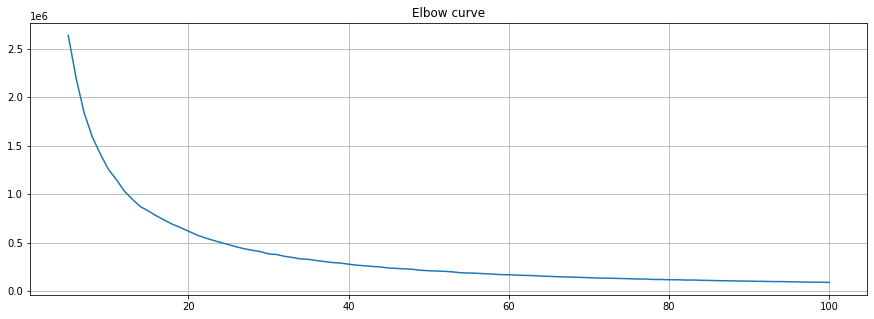

In [ ]:
from sklearn import preprocessing
print("##"*30)
print("K-Means Clustering")
print("##"*30)
# 시도해 볼 cluster 수
cluster_number = range(5,101)
distortions = []
processed_data = doc_vec_100.copy()
scaler = preprocessing.MinMaxScaler()
#scaler.fit_transform(docvecmodel.docvecs.vectors_docs)
scaler.fit_transform(df)

# 모델 학습
for k in cluster_number:
    Clustering_Method = KMeans(n_clusters=k, random_state = 0)
    #X = model.docvecs.vectors_docs 
    #Clustering_Method.fit(docvecmodel.docvecs.vectors_docs)
    Clustering_Method.fit(df)
    distortions.append(Clustering_Method.inertia_)
    
# Elbow Curve 시각화
fig = plt.figure(figsize=(15, 5))
plt.plot(cluster_number, distortions)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [ ]:
from math import*
def euclidean_distance(x, y):
    return sqrt(sum(pow(a - b, 2) for a, b in zip(x, y)))

In [ ]:
Clustering_Method = KMeans(n_clusters=13, random_state=0)
X = docvecmodel.docvecs.vectors_docs # document vector 전체를 가져옴. 
#processed_data = tsnedata.copy()
scaler = preprocessing.MinMaxScaler()
scaler.fit_transform(X)
Clustering_Method.fit(X)# fitting 
count = 0
#Clustering_Method.cluster_centers_
cluster_dict = {i:[] for i in range(0, 15)}
for text, label in zip(range(len(doc_vec_100)), Clustering_Method.labels_):
    a = []
    a.append(doc_vec_100['convrs'].loc[text])
    #a.append([doc_vec['tsne_x'].loc[text],doc_vec['tsne_y'].loc[text]])
    a.append([doc_vec_100['text'].loc[text]])
    a.append([doc_vec_100['trained_vector'].loc[text]])
    cluster_dict[label].append(a)
    

item_all_doc2vec = pd.DataFrame(columns = ['cluster','convrs','vec','distance','token'])
for (label, lst), y in zip(cluster_dict.items(),Clustering_Method.cluster_centers_):
    item = pd.DataFrame(columns = ['cluster','convrs','vec','distance','token'])
    print(f"Cluster {label}")
    for x in lst:
          token = str(x[1][0])
          vec = str(x[2][0])
          #print(x[2])
          #print(y)
          print(x[0])
          distance = euclidean_distance(x[2][0],y)
          new_df = pd.DataFrame({'cluster':label,
                                'vec': vec,
                                'token': token,
                                'convrs':x[0],
                                'distance': distance},index = [0])
          count+=1
          item = pd.concat([item,new_df], ignore_index = True)
    item = item.sort_values('distance')
    item_all_doc2vec = pd.concat([item_all_doc2vec, item], ignore_index = True)
    print("--"*30)
print(count)
print("##"*20)

Cluster 0
카트도 잘 되고 하는데 카트가 조금 안될 때도 있잖아 스매싱도 잘 하고
그런데 카트로 수비도 잘해야지만 공격도 잘하는데
그런데 진짜 어제 그 에이스들이 치는 거 보니까 진짜 볼만 하더라고
왜냐하면 에이스에서 치는 사람들 이렇게 보면 너무 삭막혀
에이스에서 한 번 치자고 들어오라고 해도 내가 잘 안 들어가는 편이거든요
나보고 그 스매싱을 해야 되는데 수비도 좀 되고 그냥 빽도 되고 다 되는데
나보고 그 스매싱을 해야 되는데 수비도 좀 되고 그냥 백도 되고 다 되는데
그런데 카트로 수비도 잘해야지만 공
바람부터 넣어야 되는데 그 바퀴에 바람 넣는 기계는 다 어디로 갔나 모르겠네
바람부터 넣어야 되는데 그 바람에 바람 넣는 기계는 다 어디로 갔나 모르겠네
딱 맞는 수영복 사서 다음 주부터 시작하면 좋을 것 같아 벌써 기대돼
작년에 너가 같이 수영 강습 듣자고 했었잖아 그때 같이 할 걸 후회했어
머리속으로 생각만 하다가 같이하게 되니까 동기부여도 더 되는 것 같아
멀리 갈 수 있는 상황이 아니었으니까 계룡산 근처에 있는 곳을 많이 갔었어
하반기 초반에는 열심히 했는데 생각보다 노력에 비해서 결과가 안 좋았어요
멀리 갈 수 있는 상황이 아니었으니까  근처에 있는 곳을 많이 갔었어
내가 또 중간에 또 조금 게을러지면 너가 나 채찍질도 해주고 많이 이끌어줘
머릿속으로 생각만 하다가  같이하게 되니까 동기부여도 더 되는 것 같아
작년에 네가 같이 수영 강습 듣자고 했었잖아 그 때 같이 할 걸 후회했어
월평동 거기 백합 아파트 앞에 인가 샛별인가 백합인가 모르겠어
당뇨는 차라리 소식으로 여러 번 먹어 줘야 혈당이 안 떨어져요
그래서 올해는 하상도로 쪽 공원으로 몽이 데리고 산책하러 가게 되는 것 같아
월평동 거기 백합 아파트 앞에인가  샛별인가  백합인가 잘 모르겠지
타선 타율 홈런 순위 이런 거 다 외울 정도로 좋아했었는데  지금은 일부러 안 봐
그런데 보니까 뉘우치는 기색이 없어 나도 그 기사를 보니까 엄청 화가 나더라고
사인도 잘해 주고 매너 좋고 그런

In [ ]:
item_all_doc2vec

,cluster,convrs,vec,distance,token
0,0,침피언스 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,[-0.06615295 0.07580895 0.00060075 -0.018940...,0.370864,"['언스', '리그', '올해', '바람']"
1,0,올래는 아무래도 받쳐 주는 힘이 조금 많이 약했으니까 외국인 투수들이 더 분발하면 좋겠어,[-0.018959 0.09849131 0.00045678 -0.057808...,0.377005,"['외국인', '투수', '분발']"
2,0,참피언 리그 올해 일등을 했으면 한다 그런 나의 바램도 또 있는 거지,[-9.72357392e-02 7.33325183e-02 2.28724256e-...,0.439838,"['피언', '리그', '올해', '바램']"
3,0,챔피언 리그 올해 일등을 했으면 한다 그런 나의 바람이 또 있는 거지,[-0.09113717 0.07486594 -0.02097445 -0.021751...,0.445110,"['챔피언', '리그', '올해', '바람']"
4,0,저는 아까 말씀하신 것처럼 우승할 때는 그 외국인 투수들이 잘 해왔잖아요,[-0.03394751 0.08174162 -0.01724732 -0.096019...,0.445592,"['말씀', '우승', '외국인', '투수']"
...,...,...,...,...,...
4816,12,그리고 덕분에 우리나라 위상이 좀 올라가고 그러잖아 자네 요즘 건강은 어때,[ 0.13700205 0.02747222 0.11015679 0.063144...,1.502485,"['덕분', '나라', '위상', '올라가', '그러', '건강']"
4817,12,요새는 최고의 스타가 손흥민이네 그리고 옛날에 박지성도 있고 이영표도 있지,[ 0.33243847 -0.03494029 0.04814043 -0.022281...,1.648599,"['요새', '최고', '스타', '손흥민', '옛날', '박지성', '이영표']"
4818,12,박세리부터 한국 골프의 명맥을 이어와서 그다음에 얼마나 많은 인재가 나왔어,[-2.18934253e-01 -1.18124098e-01 -5.61846904e-...,1.665562,"['박세리', '한국', '골프', '명맥', '다음', '인재']"
4819,12,이번에 처음으로 메이저에서 우승 상금이 제일 큰 상을 탔잖아,[ 0.04650025 -0.11396611 0.01481305 0.053277...,1.949097,"['이번', '처음', '메이저', '우승', '상금']"


In [ ]:
item_all_doc2vec.drop(item_all_doc2vec[item_all_doc2vec['distance']>1.0].index, inplace = True)

In [ ]:
for i,j in zip(item_all_doc2vec['convrs'], item_all_doc2vec['cluster']):
  print(j)
  print(i)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
4
거기서는 박항서 감독이 아주 영웅이 되어 있더라고  영웅이래
4
솔직히 그래서 그 박흥식 감독  만나면은 나는 그런 얘기라도 좀 하고 싶더라고
4
왜냐하면 아까 구슬이가 얘기했듯이  의 모든 게 감독 탓은 아니거든
4
걔도 최강희 감독하고 잘 맞은 거지만  그 팀의 스타일과도 잘 맞은 거야
4
솔직히 그래서 그 박홍식 감독 대행을 만나면은 나는 그런 얘기라도 좀 하고 싶더라고
4
가게 되면 그쪽에서 찾아 봐야지 그 우리가 갈려고 하는 데가 지금 베트남이잖아
4
솔직히 그래서 그 박행식 감독 대행을 만나면은 나는 그런 얘기라도 좀 하고 싶드라고
4
기아도 감독 바뀌고 막 올라갔지  그리고 또 롯데도 감독 바꾸니 올라갔어
4
두번째가 박지성이 히딩크 감독을 만났듯이 코치를 잘 만나야 되는 거지
4
기아도 감독 바뀌고 막 올라갔지  그리고 또 롯데도 감독 바뀌니 올라갔어
4
베트남이나 뭐 다낭 이런데 가려고 하면 그쪽에서도 뭐 레저 같은 걸 찾아봐야지
4
근데 박항서를 보니까 젊었을 때부터 자기가 얼마나 열심히 공부했는지 모른대
4
그리고 나는 감독 바꾸자는 이야기하는 우리 팬들 보면 좀 안타까운 거야
4
그래서 그런 거 보면 박항서 감독은 진짜 대한민국 애국자다  그런 생각이 들어
4
우리가 우리 나이 대에 특별하게 다른 운동 할 수 있는 건 없는 거 같아
4
왜냐하면 아까 구슬이가 얘기했듯이  부진의 모든 게 감독 탓은 아니거든
4
베트남에서 온 국민 중에 박항서를 사랑하지 않는 사람이 없다는 거야
4
 그리고 나는 감독 바꾸자는 얘기하는 우리 팬들 보면 좀 안타까운 거야
4
박지성은 히딩크 감독을 안 만났으면  맨유의 박지성은 존재하지 않았겠지
4
지금 베트남에 가 있는 박항서 감독을 한번 이야기를 해 보자고
4
그래서 더 깨끗하고 올바른 스포츠계로 바꾸어 나가게 되면 좋지 않을까 싶어 나는
4
그렇게  바꾸면서 서로 그런 존경의 표시를 하고 또 그렇게 멋지게 뛰는 거지
4
박지성이 히딩크를 

In [ ]:
item_all_doc2vec.to_csv('item_all_doc2vec_k-means.csv')

In [ ]:
item_all_doc2vec.loc[item_all_doc2vec['cluster']==3
                     ]

,cluster,convrs,vec,distance,token
1276,3,내가 다리도 상태가 안 좋으니까 허리에 얼마나 무리가 가는지,[ 0.06467512 0.00707839 -0.18263514 0.029332...,0.327983,"['다리', '상태', '허리', '무리']"
1277,3,맞아 그거는 좀 하고 싶어 근데 지금은 어깨 때문에 병원을 좀 가 봐야 될 것 같아,[-0.02293663 0.0711579 -0.10525828 0.051330...,0.367489,"['어깨', '병원']"
1278,3,막 허리도 아프고 막 햇빛에 너무 못 이겨 갖고 내가 못 하거든,[ 0.00967719 0.09011301 -0.16965051 0.032686...,0.371832,"['허리', '아프', '햇빛']"
1279,3,병원에서도 그래서 지금은 그냥 간간하게 무리하지 않고 헬스만 하고 있지,[-0.02293994 0.04235564 -0.12715726 0.080861...,0.387388,"['병원', '무리', '헬스']"
1280,3,그니까 요새 테니스는 내가 어깨 아파서 못 하니까 정말 너무 아쉬운 거 같아,[ 3.79894078e-02 4.82991450e-02 -1.70177564e-...,0.387593,"['테니스', '어깨']"
...,...,...,...,...,...
1522,3,네살 때 아빠가 운전을 하다가 사고가 나서 무릎 이하를 못 쓰신대,[ 0.03458497 0.22034155 -0.17427708 0.104365...,0.992540,"['아빠', '운전', '사고', '무릎', '이하']"
1523,3,하지만 작심삼일을 계속 반복하다 보면 요가 같은 경우 몸이 적응을 하겠지,[-0.01092091 0.1854249 0.05923973 0.155850...,0.992675,"['작심삼일', '반복', '경우', '적응']"
1524,3,탁구가 전신 운동이라서 무리 없이 살 빼는 데는 최고 좋을 것 같아,[-1.08705238e-01 3.92744318e-03 -1.32348418e-...,0.993594,"['탁구', '전신', '운동', '무리', '최고']"
1525,3,의사 선생님이 교정을 하고 나면 운동하는 방법도 가르쳐준다더라고,[ 0.05683141 0.0332161 -0.09092861 0.035737...,0.994763,"['의사', '선생', '교정', '운동', '방법']"
